# EDA process

In [4]:
import pandas as pd

df=pd.read_csv("Job_Market_India_clean.csv")
df.head()

,Record_Date,Company_Name,Job_Role,Experience_Level,City,Salary_INR,Demand_Index,Remote_Option_Flag,Salary_Trend_Pct
0,11/22/2015,State Bank of India,Product Manager,0-1 years,Noida,1615767,71,0,8.72
1,11/22/2015,Hindustan Unilever,Frontend Developer,0-1 years,Hyderabad,790163,81,0,5.26
2,11/22/2015,Bharat Petroleum,Software Engineer,5-8 years,Bangalore,1104756,94,0,0.08
3,11/22/2015,HDFC Bank,UI/UX Designer,5-8 years,Mumbai,905086,94,1,8.22
4,11/22/2015,Maruti Suzuki,Data Analyst,1-3 years,Bangalore,578687,35,0,11.54


In [6]:
print(df)

      Record_Date               Company_Name                      Job_Role  \
0      11/22/2015        State Bank of India               Product Manager   
1      11/22/2015         Hindustan Unilever            Frontend Developer   
2      11/22/2015           Bharat Petroleum             Software Engineer   
3      11/22/2015                  HDFC Bank                UI/UX Designer   
4      11/22/2015              Maruti Suzuki                  Data Analyst   
...           ...                        ...                           ...   
29995  11/18/2025         Aditya Birla Group  Digital Marketing Specialist   
29996  11/18/2025              Maruti Suzuki            Operations Manager   
29997  11/18/2025  Tata Consultancy Services               DevOps Engineer   
29998  11/18/2025           HCL Technologies     Machine Learning Engineer   
29999  11/18/2025                  Axis Bank               DevOps Engineer   

      Experience_Level       City  Salary_INR  Demand_Index  \


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Record_Date         30000 non-null  object 
 1   Company_Name        30000 non-null  object 
 2   Job_Role            30000 non-null  object 
 3   Experience_Level    30000 non-null  object 
 4   City                30000 non-null  object 
 5   Salary_INR          30000 non-null  int64  
 6   Demand_Index        30000 non-null  int64  
 7   Remote_Option_Flag  30000 non-null  int64  
 8   Salary_Trend_Pct    30000 non-null  float64
dtypes: float64(1), int64(3), object(5)
memory usage: 2.1+ MB


Here's a simple example to illustrate `isnull().sum()`:

In [9]:
import pandas as pd
import numpy as np

# Create a sample DataFrame with some missing values
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': ['apple', 'banana', 'orange', np.nan, 'grape'],
    'C': [True, False, True, np.nan, False]
}
df_sample = pd.DataFrame(data)

print("Original DataFrame:")
display(df_sample)

print("\nDataFrame after isnull():")
display(df_sample.isnull())

print("\nMissing values count per column (isnull().sum()):")
display(df_sample.isnull().sum())

Original DataFrame:


,A,B,C
0,1.0,apple,True
1,2.0,banana,False
2,NaN,orange,True
3,4.0,NaN,NaN
4,5.0,grape,False



DataFrame after isnull():


,A,B,C
0,False,False,False
1,False,False,False
2,True,False,False
3,False,True,True
4,False,False,False



Missing values count per column (isnull().sum()):


,0
A,1
B,1
C,1


To ensure proper date-based operations and analysis, let's convert the `Record_Date` column from `object` to `datetime` type.

In [8]:
df['Record_Date'] = pd.to_datetime(df['Record_Date'])
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Record_Date         30000 non-null  datetime64[ns]
 1   Company_Name        30000 non-null  object        
 2   Job_Role            30000 non-null  object        
 3   Experience_Level    30000 non-null  object        
 4   City                30000 non-null  object        
 5   Salary_INR          30000 non-null  int64         
 6   Demand_Index        30000 non-null  int64         
 7   Remote_Option_Flag  30000 non-null  int64         
 8   Salary_Trend_Pct    30000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 2.1+ MB


None

In [10]:
import sqlite3

conn= sqlite3.connect("job_market_india.db")
print("database connected!")

database connected!


In [12]:
df.to_sql('Jobmarket', conn, if_exists='replace', index=False)

query1="""SELECT
    Job_Role,
    Salary_INR
FROM Jobmarket
GROUP BY Job_Role
ORDER BY Salary_INR
LIMIT 6;
"""
Top6_paid= pd.read_sql_query(query1,conn)
print(Top6_paid)

                       Job_Role  Salary_INR
0             Backend Developer      539877
1                  Data Analyst      578687
2               DevOps Engineer      580846
3            Frontend Developer      790163
4  Digital Marketing Specialist      867096
5         Cybersecurity Analyst      873271


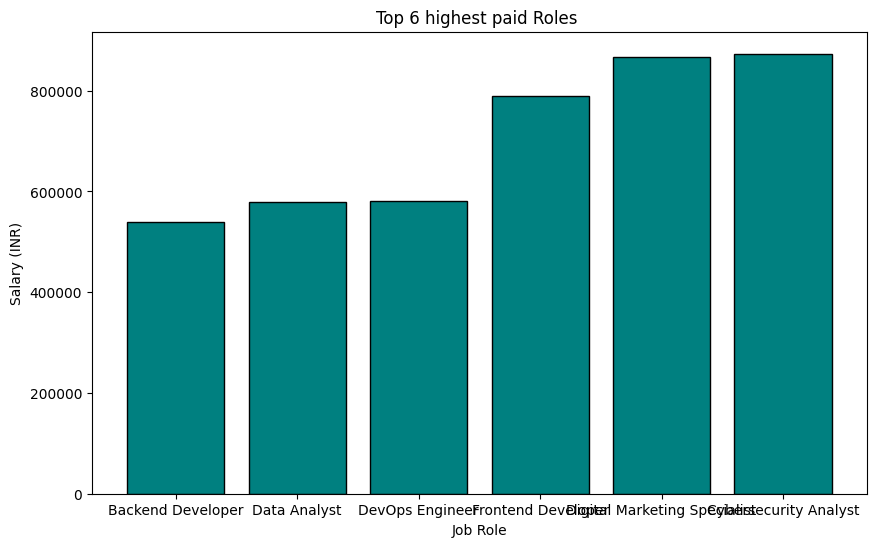

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(Top6_paid["Job_Role"],Top6_paid["Salary_INR"],color="teal",
        edgecolor="black")
plt.xlabel("Job Role")
plt.ylabel("Salary (INR)")
plt.title("Top 6 highest paid Roles ")
plt.show()

In [15]:
df.to_csv("Job_Market_corrected.csv", index= False)